In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [3]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [4]:
from konlpy.tag import Twitter 
from collections import Counter

In [185]:
final = pd.read_csv('./data/중복제거_전처리완료.csv')

In [186]:
final.head()

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']


In [187]:
# final = final[['title','genre']]

In [188]:
# final.to_csv('final_genre.csv', index = False)

In [189]:
final.shape

(6489, 2)

In [190]:
final.groupby('genre').size().sort_values(ascending = False)

genre
['발라드']                            2158
['댄스']                             1421
['랩/힙합']                            961
['R&B/Soul']                        521
['발라드', '국내드라마']                    509
['록/메탈']                            321
['POP']                              67
['인디음악', '포크/블루스']                   66
['포크/블루스']                           56
['댄스', '국내드라마']                      45
['인디음악', '록/메탈']                     45
['일렉트로니카']                           35
['국내드라마']                            34
['발라드', '인디음악']                      33
['랩/힙합', '인디음악']                     28
['발라드', 'R&B/Soul', '국내드라마']         18
['록/메탈', '국내드라마']                    14
['댄스', '랩/힙합']                       13
['발라드', '국내영화']                      13
['포크/블루스', '국내드라마']                  12
['R&B/Soul', '국내드라마']                12
['랩/힙합', '국내드라마']                    11
['인디음악', '일렉트로니카']                   10
['POP', '록/메탈']                       7
['록/메탈', '국외영화']                  

# 3. 랩/힙합

In [191]:
# 랩/힙합 = final[final['genre'] == '랩/힙합']
힙합 = final[final['genre'].str.contains('랩/힙합')]

In [192]:
힙합

,title,genre
9,싸이렌 (Siren),['랩/힙합']
34,마법의 성,['랩/힙합']
36,사랑경보,"['발라드', '랩/힙합']"
43,"헤어지지 못하는 여자, 떠나가지 못하는 남자",['랩/힙합']
54,로맨틱 겨울,['랩/힙합']
...,...,...
6467,존버,['랩/힙합']
6480,남겨짐에 대해,['랩/힙합']
6484,을,['랩/힙합']
6485,낙서,['랩/힙합']


In [193]:
힙합 = 힙합['title']

In [194]:
힙합.to_csv('중복제거_힙합.txt', index = False)

# 텍스트 파일 불러오기

In [15]:
file = open("중복제거_힙합.txt", 'r') 
lists = file.readlines() 
file.close() 
lists

['싸이렌 (Siren) \n',
 '마법의 성\n',
 '사랑경보 \n',
 '"헤어지지 못하는 여자, 떠나가지 못하는 남자 "\n',
 '로맨틱 겨울 \n',
 '160 \n',
 '할렐루야\n',
 '죽일 놈 (Guilty)\n',
 '우리 지금 만나 \n',
 '아이처럼 \n',
 '가슴에 살아 \n',
 '보란듯이 \n',
 'Love Me Love Me \n',
 '주변인\n',
 '피에로의 눈물2 \n',
 'Run\n',
 '빅토리2010 \n',
 '바보 \n',
 '래퍼들이 헤어지는 방법 \n',
 'Step Up\n',
 'Nothin` On You \n',
 '믿겨지지 않는 이야기\n',
 '만우절 (Mirror)\n',
 'Man Up \n',
 '쿨하지 못해 미안해 (No Cool I`m Sorry)\n',
 'Outta Kontrol\n',
 'Airplanes \n',
 '쉐이크 (Shake)!\n',
 '사랑은 전쟁이다 \n',
 'Not Afraid\n',
 '땡땡땡\n',
 'Go칼로리 \n',
 '기억상실증 \n',
 'Generation Lost\n',
 '랄라랜드 \n',
 '회전목마 \n',
 'Turn It Up\n',
 '죽을 만큼 아파서 \n',
 'Love The Way You Lie \n',
 '너 때문이야 \n',
 '별놈 (Star)\n',
 'You`re My V.I.P \n',
 'Pop & Drop \n',
 '나 이런사람이야\n',
 '부치지 못한 편지\n',
 '미안해 사랑해서...\n',
 '개키워 (2010 New Ver.)\n',
 '오늘밤 \n',
 '투게더\n',
 'In To The Rain \n',
 '이리로 \n',
 'I Believe \n',
 '서커스 (Suckers) \n',
 'Ska\n',
 'Love \n',
 'Fat Girl (45RPM)\n',
 '오빠 그런 사람 아니다\n',
 '투게더 (Remix)\n',
 '될대로 되라 \n',
 'Doin` Good\n',
 

# 형태소 나누기

In [16]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [17]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['싸이렌', '마법', '성', '사랑', '경보', '여자', '남자', '로맨틱', '겨울', '할렐루야', '놈', '우리', '지금', '아이', '가슴', '살', '듯이', '주변인', '피에로', '눈물', '빅토리', '바보', '래퍼', '방법', '이야기', '만우절', '쉐이크', '사랑', '전쟁', '땡땡', '땡', '칼로리', '기억상실증', '랜드', '회전목마', '죽', '만큼', '너', '때문', '별놈', '사람', '못', '편지', '사랑', '개', '오늘밤', '리', '서커스', '오빠', '사람', '울', '너', '린다', '왜', '맛', '산', '그땐', '그땐', '그땐', '눈', '삐', '해', '로미오', '줄리엣', '주인공', '연예인', '너', '탄띠', '난리', '브루스', '약속', '약속', '바보', '왜', '이별', '뒤', '몇', '가지', '뻑이가', '집', '악몽', '어쩌란', '오늘', '톡톡', '어베일러블', '별', '새벽', '시반', '본능', '톡톡', '비', '로카', '사랑', '습관', '배', '가면', '주먹', '걸', '키덜트', '사랑', '따위', '개', '두루', '와바루', '래퍼', '방법', '걸스데이', '민아', '를', '레이싱', '퀸', '놈', '답', '너', '회상', '그대', '모두', '전', '새', '강남', '사', '독기', '격산', '타우', '아보', '놈', '답', '너', '히어로', '오빠', '미래', '집', '안부', '밑바닥', '밀물', '숨', '우리', '결혼', '요', '해뜰때', '금요일', '넘버원', '아보', '살', '발해', '막잔', '사선', '거기', '거기', '광대', '추억', '참고', '살', '살', '너', '문자', '사랑', '년', '전', '그날', '얘기', '준비', '품', '사람', '어머니', '된장국', '두', '마리', 

# 빈도수대로 정렬하기

In [18]:
count = Counter(noun_adj_adv_list)

In [19]:
words = dict(count.most_common())

In [20]:
words

{'사랑': 18,
 '너': 17,
 '사람': 9,
 '놈': 7,
 '비': 6,
 '때': 6,
 '우리': 5,
 '개': 5,
 '왜': 5,
 '해': 5,
 '집': 5,
 '좀': 5,
 '니': 5,
 '시간': 5,
 '살': 4,
 '눈물': 4,
 '오빠': 4,
 '오늘': 4,
 '날': 4,
 '밤': 4,
 '그': 4,
 '또': 4,
 '남자': 3,
 '겨울': 3,
 '못': 3,
 '리': 3,
 '그땐': 3,
 '이별': 3,
 '걸': 3,
 '그대': 3,
 '모두': 3,
 '전': 3,
 '돈': 3,
 '더': 3,
 '노래': 3,
 '이': 3,
 '널': 3,
 '술': 3,
 '손': 3,
 '냄새': 3,
 '마음': 3,
 '여자': 2,
 '지금': 2,
 '바보': 2,
 '래퍼': 2,
 '방법': 2,
 '이야기': 2,
 '땡땡': 2,
 '편지': 2,
 '오늘밤': 2,
 '눈': 2,
 '삐': 2,
 '난리': 2,
 '약속': 2,
 '뒤': 2,
 '가지': 2,
 '악몽': 2,
 '톡톡': 2,
 '별': 2,
 '새벽': 2,
 '본능': 2,
 '배': 2,
 '답': 2,
 '새': 2,
 '아보': 2,
 '결혼': 2,
 '거기': 2,
 '얘기': 2,
 '두': 2,
 '인연': 2,
 '정리': 2,
 '행복': 2,
 '심': 2,
 '뭐': 2,
 '시작': 2,
 '소리': 2,
 '태양': 2,
 '아래': 2,
 '전화': 2,
 '줄': 2,
 '둘': 2,
 '가끔': 2,
 '아침': 2,
 '범죄': 2,
 '연락': 2,
 '알': 2,
 '노': 2,
 '세상': 2,
 '만해': 2,
 '링': 2,
 '그린': 2,
 '라이트': 2,
 '전화번호': 2,
 '곡': 2,
 '몸': 2,
 '연결고리': 2,
 '엔딩': 2,
 '생애': 2,
 '가장': 2,
 '아무': 2,
 '바람': 2,
 '거북선': 2,
 '기분': 2,
 '

# 사랑,사람, 너 제거

In [21]:
del words['사랑']
del words['사람']
del words['너']

# 워드 클라우드 만들기

In [22]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [23]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


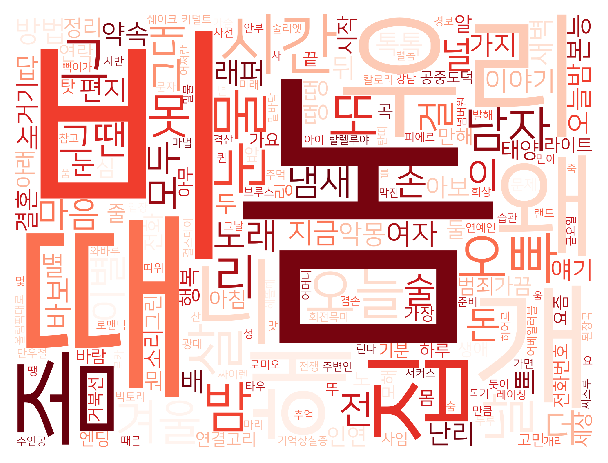

In [24]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='White',colormap = "Reds", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [59]:
from PIL import Image
import numpy as np

In [60]:
alice_mask = np.array(Image.open("./alice_mask.png"))

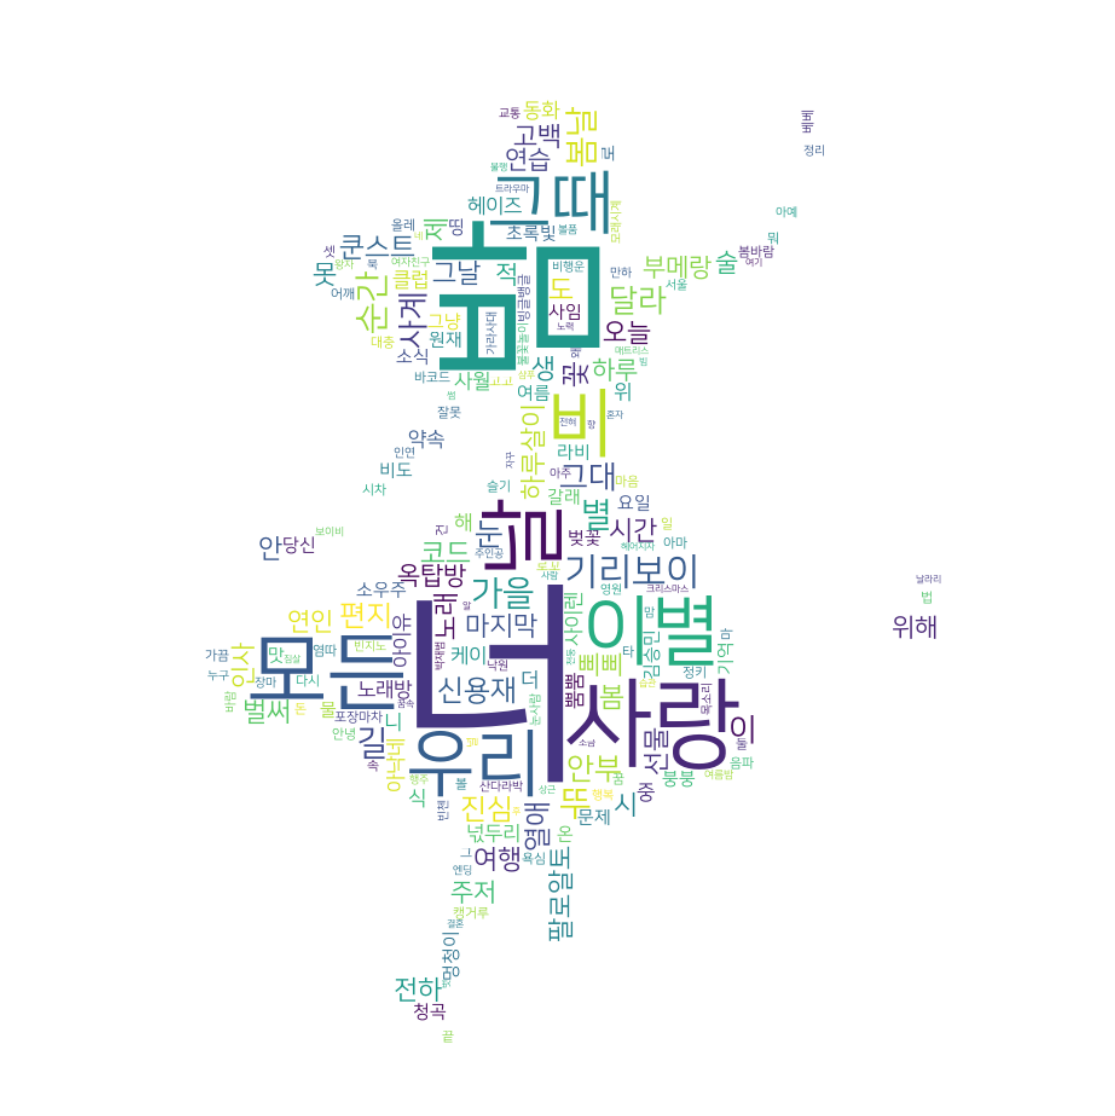

In [62]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()